In [1]:
def ComputeTeq(StarTeff, StarRad, sep, Ab = 0.3, fprime = 1/4):
    ''' from Seager 2016 Exoplanet Atmospheres eqn 3.9
    https://books.google.com/books?id=XpaYJD7IE20C
    '''
    StarRad = StarRad.to(u.km)
    sep = sep.to(u.km)
    return (StarTeff * np.sqrt(StarRad/sep) * ((fprime * (1 - Ab))**(1/4))).value



In [5]:
# For those without radius look up using Teff
x = pd.read_table('EEM_dwarf_UBVIJHK_colors_Teff.txt', delim_whitespace=True, comment='#',
                 nrows=118)

for i in range(len(x)):
    if x['R_Rsun'][i] == '...':
        x['R_Rsun'][i] = np.nan
    x['R_Rsun'][i] = float(x['R_Rsun'][i])

from scipy.interpolate import UnivariateSpline
GetStarRadSpl = UnivariateSpline(x['Teff'][:110][::-1], x['R_Rsun'][:110][::-1])



/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_93359/1583559120.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['R_Rsun'][i] = float(x['R_Rsun'][i])
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_93359/1583559120.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['R_Rsun'][i] = np.nan


<IPython.core.display.Javascript object>


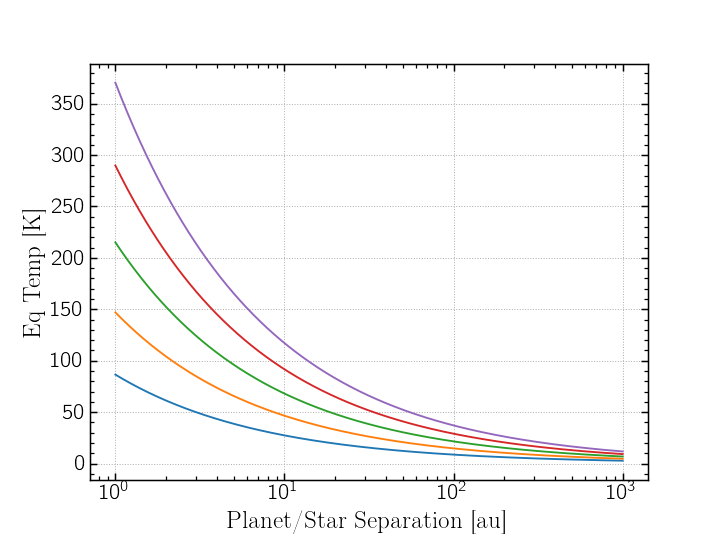

In [7]:
%matplotlib notebook

Teffs = np.arange(3000,8000,1000)
sep = np.logspace(0,3,1000)

for Teff in Teffs:
    R = GetStarRadSpl(Teff)
    teq = []
    for i in range(len(sep)):
        teq.append(ComputeTeq(Teff, R*u.Rsun, sep[i]*u.au))
    
    plt.plot(sep, teq)
ax=plt.gca()
ax.set_xscale('log')
#ax.set_xlim(0,20)
#ax.set_ylim(bottom=1e-2)
ax.set_ylabel(r'Eq Temp [K]')
ax.set_xlabel('Planet/Star Separation [au]')
ax.grid(ls=':')